In [1]:
ls

classification_CV.ipynb    kmeans.ipynb
classification.ipynb       NUSW-NB15_features.csv
KDD_Classification.ipynb   UNSW-NB15.csv
kddcup_corrected.csv       UNSW_NB15_testing-set.csv
kddcup.data.corrected.csv  UNSW_NB15_training-set.csv
KDDTrain+.csv              UNSW_NB15_training-set_selected.csv


In [15]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.model_selection import train_test_split
import time

In [19]:
def train_split(data):
    X_train=data.drop(['class.'], axis=1)
    y_train=data['class.']
    return X_train,y_train

data_train = pd.read_csv('./kddcup_corrected.csv')
data_train.replace({'smurf.': 'DOS', 'normal.': 'Normal', 'neptune.': 'DOS', 'snmpgetattack.': 'R2L',
                    'mailbomb.': 'DOS', 'guess_passwd.': 'R2L', 'snmpguess.': 'R2L', 'satan.': 'Probe',
                    'warezmaster.': 'R2L', 'back.': 'DOS', 'mscan.': 'Probe', 'apache2.': 'DOS', 'processtable.': 'DOS', 
                    'saint.': 'Probe', 'portsweep.': 'Probe', 'ipsweep.': 'Probe', 'httptunnel.': 'R2L', 'pod.': 'DOS', 
                    'nmap.': 'Probe', 'buffer_overflow.': 'U2R', 'multihop.': 'R2L', 'named.': 'R2L', 'sendmail.': 'R2L',
                    'ps.': 'U2R', 'xterm.': 'U2R', 'rootkit.': 'U2R', 'teardrop.': 'DOS', 'xlock.': 'R2L', 'land.': 'DOS',
                    'xsnoop.': 'R2L', 'ftp_write.': 'R2L', 'phf.': 'R2L', 'udpstorm.': 'DOS', 'perl.': 'U2R', 
                    'loadmodule.': 'U2R', 'worm.': 'DOS', 'sqlattack.': 'U2R', 'imap.': 'R2L'}, inplace=True)

X_train,Y_train = train_split(data_train)

print(Counter(Y_train))

Counter({'DOS': 229855, 'Normal': 60593, 'R2L': 16345, 'Probe': 4166, 'U2R': 70})


In [20]:
from sklearn.preprocessing import OneHotEncoder

X1 = X_train.select_dtypes(include=['object'])
ohe = OneHotEncoder()
X1_ohe = pd.DataFrame(ohe.fit_transform(X1).toarray())

print(X1_ohe.shape)

X2 = X_train.select_dtypes(exclude=['object'])
sc = StandardScaler()
X2_sc = pd.DataFrame(sc.fit_transform(X2))
print(X2_sc.shape)

X_train_sc1 = pd.concat([X1_ohe,X2_sc], axis=1, sort=False)
print(X_train_sc1.shape)

(311029, 79)
(311029, 38)
(311029, 117)


In [21]:
#instanciation
sc = StandardScaler()

encoder = LabelEncoder()
Y_train_1 = encoder.fit_transform(Y_train)
print(encoder.classes_)
print(encoder.transform(encoder.classes_))

X_train_sc, X_test_sc, Y_train_en, Y_test_en = train_test_split(X_train_sc1, Y_train_1, test_size=0.1)
print(Counter(Y_train_en))
print(Counter(Y_test_en))

['DOS' 'Normal' 'Probe' 'R2L' 'U2R']
[0 1 2 3 4]
Counter({0: 207011, 1: 54482, 3: 14646, 2: 3723, 4: 64})
Counter({0: 22844, 1: 6111, 3: 1699, 2: 443, 4: 6})


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

param_grid = {'max_depth': [10, 100, 500, 800, 1000], 'n_estimators': [ 100,500,400, 200, 300, 600]}
randomForest_clf = RandomForestClassifier()
grid_search = GridSearchCV(randomForest_clf, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train_sc, Y_train_en)
clf1 = grid_search.best_estimator_
print("train accuracy: ", accuracy_score(Y_train_en, clf1.predict(X_train_sc)))
start = time. time()
y_pred_RF = clf1.predict(X_test_sc)
end = time. time()
RF_time=end - start
accuracy_score_RF=accuracy_score(Y_test_en, y_pred_RF)
precision_score_RF=precision_score(Y_test_en, y_pred_RF, average=None)
recall_score_RF=recall_score(Y_test_en, y_pred_RF, average=None)
print("test accuracy: ",accuracy_score_RF )
print("test precision: ", precision_score_RF)
print("test recall: ",recall_score_RF )

train accuracy:  0.9816558661932082
test accuracy:  0.9807092563418319
test precision:  [0.99991245 0.95360316 0.99774266 0.8183391  1.        ]
test recall:  [0.99991245 0.94845361 0.99774266 0.83519717 0.66666667]


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

param_grid = {'C': [1, 10, 100, 1000, 10000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']}
svm_clf = SVC()
grid_search = GridSearchCV(svm_clf, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train_sc, Y_train_en)
clf2 = grid_search.best_estimator_
start = time. time()
y_pred_SVC = clf2.predict(X_test_sc)
end = time. time()
SVM_time=end - start
accuracy_score_SVM=accuracy_score(Y_test_en, y_pred_SVC)
precision_score_SVM=precision_score(Y_test_en, y_pred_SVC, average=None)
recall_score_SVM=recall_score(Y_test_en, y_pred_SVC, average=None)
print("test accuracy: ",accuracy_score_SVM )
print("test precision: ", precision_score_SVM)
print("test recall: ",recall_score_SVM )

print(grid_search.best_params_)

test accuracy:  0.9658553837250426
test precision:  [0.99986868 0.86770485 0.98434004 0.84754797 1.        ]
test recall:  [0.99991245 0.97561774 0.99322799 0.46792231 0.33333333]
{'C': 10000, 'gamma': 0.001, 'kernel': 'rbf'}


In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

gnb_clf = GaussianNB()
param_grid = {}
grid_search = GridSearchCV(gnb_clf, param_grid,cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train_sc, Y_train_en)
clf6 = grid_search.best_estimator_
start = time. time()
y_pred_G = clf6.predict(X_test_sc)
end = time. time()
NB_time=end - start
accuracy_score_NB=accuracy_score(Y_test_en, y_pred_G)
precision_score_NB=precision_score(Y_test_en, y_pred_G, average=None)
recall_score_NB=recall_score(Y_test_en, y_pred_G, average=None)
print("train accuracy: ", accuracy_score(Y_train_en, clf6.predict(X_train_sc)))
print("test accuracy: ",accuracy_score_NB )
print("test precision: ",precision_score_NB)
print("test recall: ",recall_score_NB )

train accuracy:  0.7472439144631081
test accuracy:  0.7483200977397678
test precision:  [0.99927772 0.88146632 0.07202901 0.5466862  0.01892744]
test recall:  [0.72675538 0.77515955 0.98645598 0.87875221 1.        ]


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

param_grid = {'max_depth': [10, 50, 100, 500, 1000]}
tree_clf = DecisionTreeClassifier()
grid_search = GridSearchCV(tree_clf, param_grid, cv=10
                           , scoring='neg_mean_squared_error')

grid_search.fit(X_train_sc, Y_train_en)
clf4 = grid_search.best_estimator_
start = time. time()
y_pred_DT = clf4.predict(X_test_sc)
end = time. time()
DT_time=end - start
accuracy_score_DT=accuracy_score(Y_test_en, y_pred_DT)
precision_score_DT= precision_score(Y_test_en, y_pred_DT, average=None)
recall_score_DT=recall_score(Y_test_en, y_pred_DT, average=None)
print("test accuracy: ", accuracy_score_DT)
print("test precision: ",precision_score_DT)
print("test recall: ", recall_score_DT)

print(grid_search.best_params_)

test accuracy:  0.9802591389898081
test precision:  [0.99982491 0.95335421 0.98876404 0.8159862  0.71428571]
test recall:  [0.99986867 0.94648994 0.99322799 0.83519717 0.83333333]
{'max_depth': 100}


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

param_grid = {'n_neighbors': [3, 5, 7, 10, 15, 20, 30]}
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(X_train_sc, Y_train_en)
clf5 = grid_search.best_estimator_
start = time. time()
y_pred_KNN = clf5.predict(X_test_sc)
end = time. time()
KNN_time=end - start
accuracy_score_KNN=accuracy_score(Y_test_en, y_pred_KNN)
precision_score_KNN=precision_score(Y_test_en, y_pred_KNN, average=None)
recall_score_KNN=recall_score(Y_test_en, y_pred_KNN, average=None)
print("test accuracy: ", accuracy_score_KNN)
print("test precision: ",precision_score_KNN )
print("test recall: ",recall_score_KNN )

print(grid_search.best_params_)

test accuracy:  0.9786515770182941
test precision:  [0.99964989 0.94631751 0.97098214 0.81404959 1.        ]
test recall:  [0.99991245 0.94616266 0.98194131 0.81165391 0.16666667]
{'n_neighbors': 15}


[0.99991245 0.95360316 0.99774266 0.8183391  1.        ]
[0.99986868 0.86770485 0.98434004 0.84754797 1.        ]
[0.99982491 0.95335421 0.98876404 0.8159862  0.71428571]
[0.99964989 0.94631751 0.97098214 0.81404959 1.        ]
[0.99927772 0.88146632 0.07202901 0.5466862  0.01892744]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

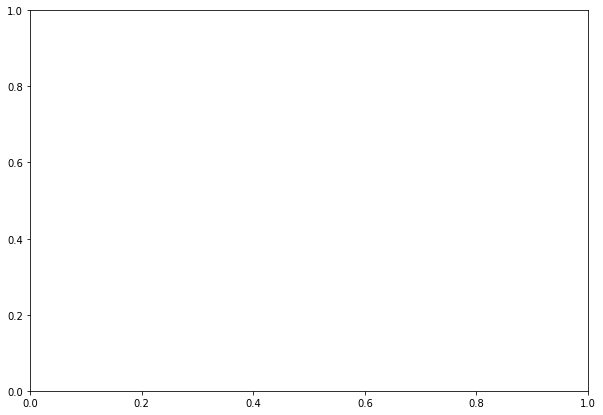

In [33]:
# data to plot
n_groups = 4
# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
print(precision_score_RF)
print(precision_score_SVM)
print(precision_score_DT)
print(precision_score_KNN)
print(precision_score_NB)
rects1 = plt.bar(index, precision_score_RF, bar_width,
alpha=opacity,
color='b',
label='RF')

rects2 = plt.bar(index + bar_width, precision_score_SVM, bar_width,
alpha=opacity,
color='g',
label='SVM')

rects3 = plt.bar(index+ 2*bar_width, precision_score_DT, bar_width,
alpha=opacity,
color='c',
label='DT')

rects4 = plt.bar(index + 3*bar_width, precision_score_KNN, bar_width,
alpha=opacity,
color='r',
label='KNN')

rects5 = plt.bar(index+ 4*bar_width, precision_score_NB, bar_width,
alpha=opacity,
color='y',
label='NB')



plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision by classes for NSL-KDD')
plt.xticks(index + bar_width, ('DoS','Normal', 'Probe', 'R2L', 'U2R'),rotation='15')
plt.legend()

plt.tight_layout()
plt.grid()

In [ ]:
[0.99991245 0.95360316 0.99774266 0.8183391  1.        ]
[0.99986868 0.86770485 0.98434004 0.84754797 1.        ]
[0.99982491 0.95335421 0.98876404 0.8159862  0.71428571]
[0.99964989 0.94631751 0.97098214 0.81404959 1.        ]
[0.99927772 0.88146632 0.07202901 0.5466862  0.01892744]
